# Importing pacakages  

In [170]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# importing data set 

In [141]:
# df = pd.read_csv(r"C:\Users\DIGITS\Downloads\archive\archive\Wine_Dataset.csv")
df = pd.read_csv(r"E:\Github\DTA\DTS\Wine_Dataset.csv")

#this displays the basic information about the dataset
print(df.info())
# Check value counts
print("Value counts:")
print(df['Alcohol'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Malic acid            198 non-null    object 
 1   Ashe                  198 non-null    float64
 2   Alcalinity of ashe    197 non-null    float64
 3   Magnesium             198 non-null    object 
 4   Total phenols         198 non-null    int64  
 5   Flavanoidse           197 non-null    object 
 6   Nonflavanoid phenols  198 non-null    object 
 7   Proanthocyanins       198 non-null    object 
 8   Color intensity       198 non-null    object 
 9   OD280                 198 non-null    float64
 10  OD31                  198 non-null    float64
 11  Proline               198 non-null    float64
 12  Alcohol               195 non-null    float64
dtypes: float64(6), int64(1), object(6)
memory usage: 20.2+ KB
None
Value counts:
Alcohol
2.0    71
3.0    68
1.0    56
Name: coun

# 2. Data cleaning (missing values, duplicates, outliers, NaN) 

In [142]:
# Check for missing values in the DataFrame and display the count for each column
print(df.isnull().sum())

# Count the number of rows that contain at least one null value
count_rows_with_nulls = df.isnull().any(axis=1).sum()
print(f"Number of rows with at least one null value: {count_rows_with_nulls}")

# Drop all rows that contain any null values from the DataFrame
df_cleaned = df.dropna()

# Optionally, display the shape of the cleaned DataFrame to confirm the number of rows after dropping nulls
print(f"Shape of the cleaned DataFrame: {df_cleaned.shape}")


Malic acid              0
Ashe                    0
Alcalinity of ashe      1
Magnesium               0
Total phenols           0
Flavanoidse             1
Nonflavanoid phenols    0
Proanthocyanins         0
Color intensity         0
OD280                   0
OD31                    0
Proline                 0
Alcohol                 3
dtype: int64
Number of rows with at least one null value: 5
Shape of the cleaned DataFrame: (193, 13)


In [143]:
# Check for duplicates and print the count
print("Number of duplicates:", df.duplicated().sum())

# Remove duplicates and store the modified DataFrame in a new variable
df_no_duplicates = df.drop_duplicates()

Number of duplicates: 5


In [144]:
# Remove rows with any non-numeric values
# df = df[df.map (lambda x: isinstance(x, (int, float)))].dropna()
# Remove rows with any non-numeric values, overwriting df
df = df.apply(pd.to_numeric, errors='coerce').dropna()
# Check value counts
print("Value counts:")
print(df['Alcohol'].value_counts())

Value counts:
Alcohol
2.0    71
3.0    66
1.0    49
Name: count, dtype: int64


In [145]:
# Check for outliers using IQR method
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = ((df < lower_bound) | (df > upper_bound)).sum()
print("Number of outliers in each column:")
print(outliers)

 

Number of outliers in each column:
Malic acid              0
Ashe                    0
Alcalinity of ashe      3
Magnesium               5
Total phenols           4
Flavanoidse             0
Nonflavanoid phenols    0
Proanthocyanins         0
Color intensity         5
OD280                   0
OD31                    1
Proline                 0
Alcohol                 0
dtype: int64


# 3.Exploratory Data Analytics(visualisation, Pie chart, Bar graphs, interactive visualisation, normal distribution, whiskey Box plot using both seaborn, matplotlib and pyplot) 

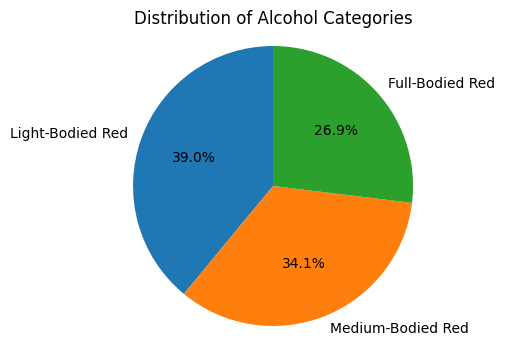

In [125]:
# Create a dictionary to map numeric classes to wine types
wine_types = {
    1: 'Full-Bodied Red', 
    2: 'Light-Bodied Red', 
    3: 'Medium-Bodied Red'
}

# Map the numeric classes in the 'Alcohol' column to corresponding wine types
df['Wine_Type'] = df['Alcohol'].map(wine_types)

# 1. Create a Pie Chart to visualize the distribution of wine types
plt.figure(figsize=(6, 4))  # Set the figure size for better visualization
alcohol_categories = df['Wine_Type'].value_counts()  # Count occurrences of each wine type

# Create the pie chart with percentages displayed
plt.pie(
    alcohol_categories.values, 
    labels=alcohol_categories.index, 
    autopct='%1.1f%%',  # Format to show percentage with one decimal
    startangle=90  # Start the pie chart at a specific angle
)

# Set the title for the pie chart
plt.title('Distribution of Alcohol Categories')
plt.axis('equal')  # Ensure the pie chart is a circle
plt.show()  # Display the pie chart

# Create a reverse mapping of wine types to numeric classes
wine_typesssss = {
    'Full-Bodied Red': 1, 
    'Light-Bodied Red': 2, 
    'Medium-Bodied Red': 3
}

# Map the wine types back to their corresponding numeric classes in the 'Alcohol' column
df['Wine_Type'] = df['Alcohol'].map(wine_typesssss)



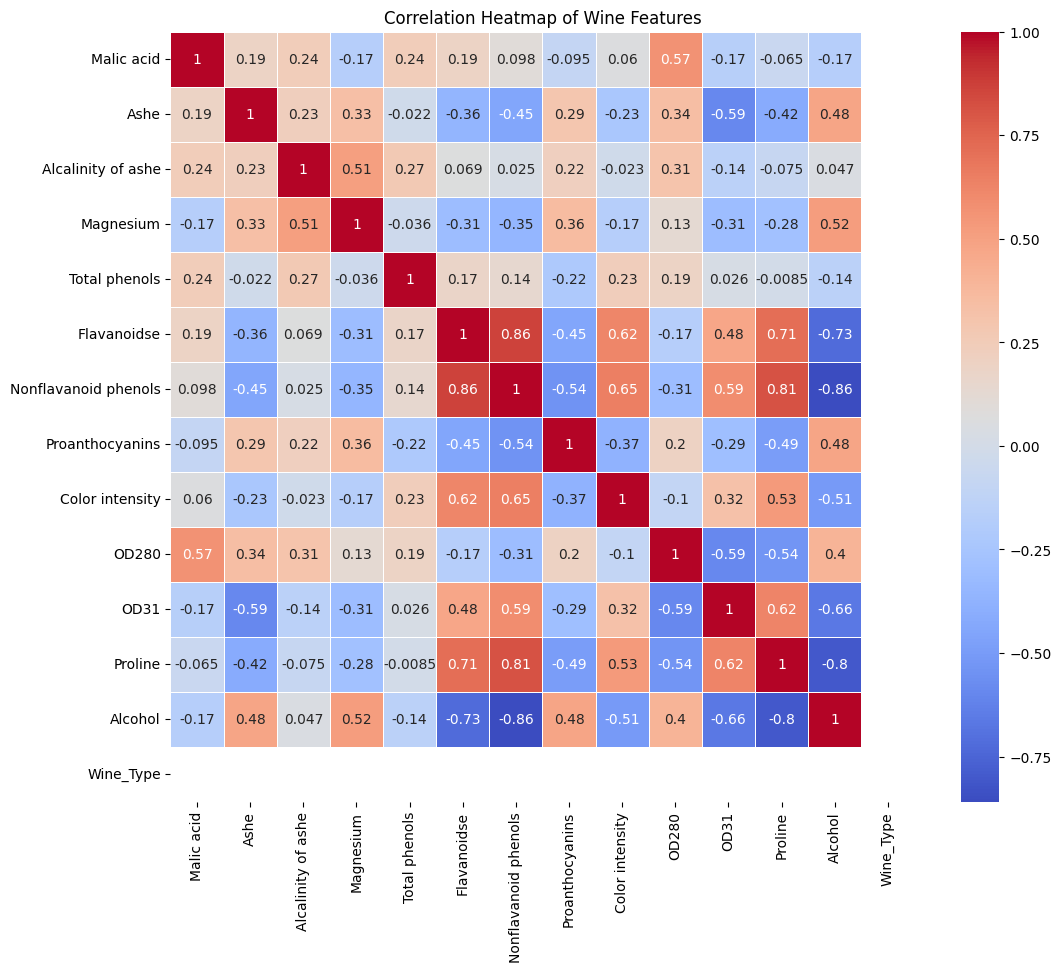

In [110]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Wine Features')
plt.show()

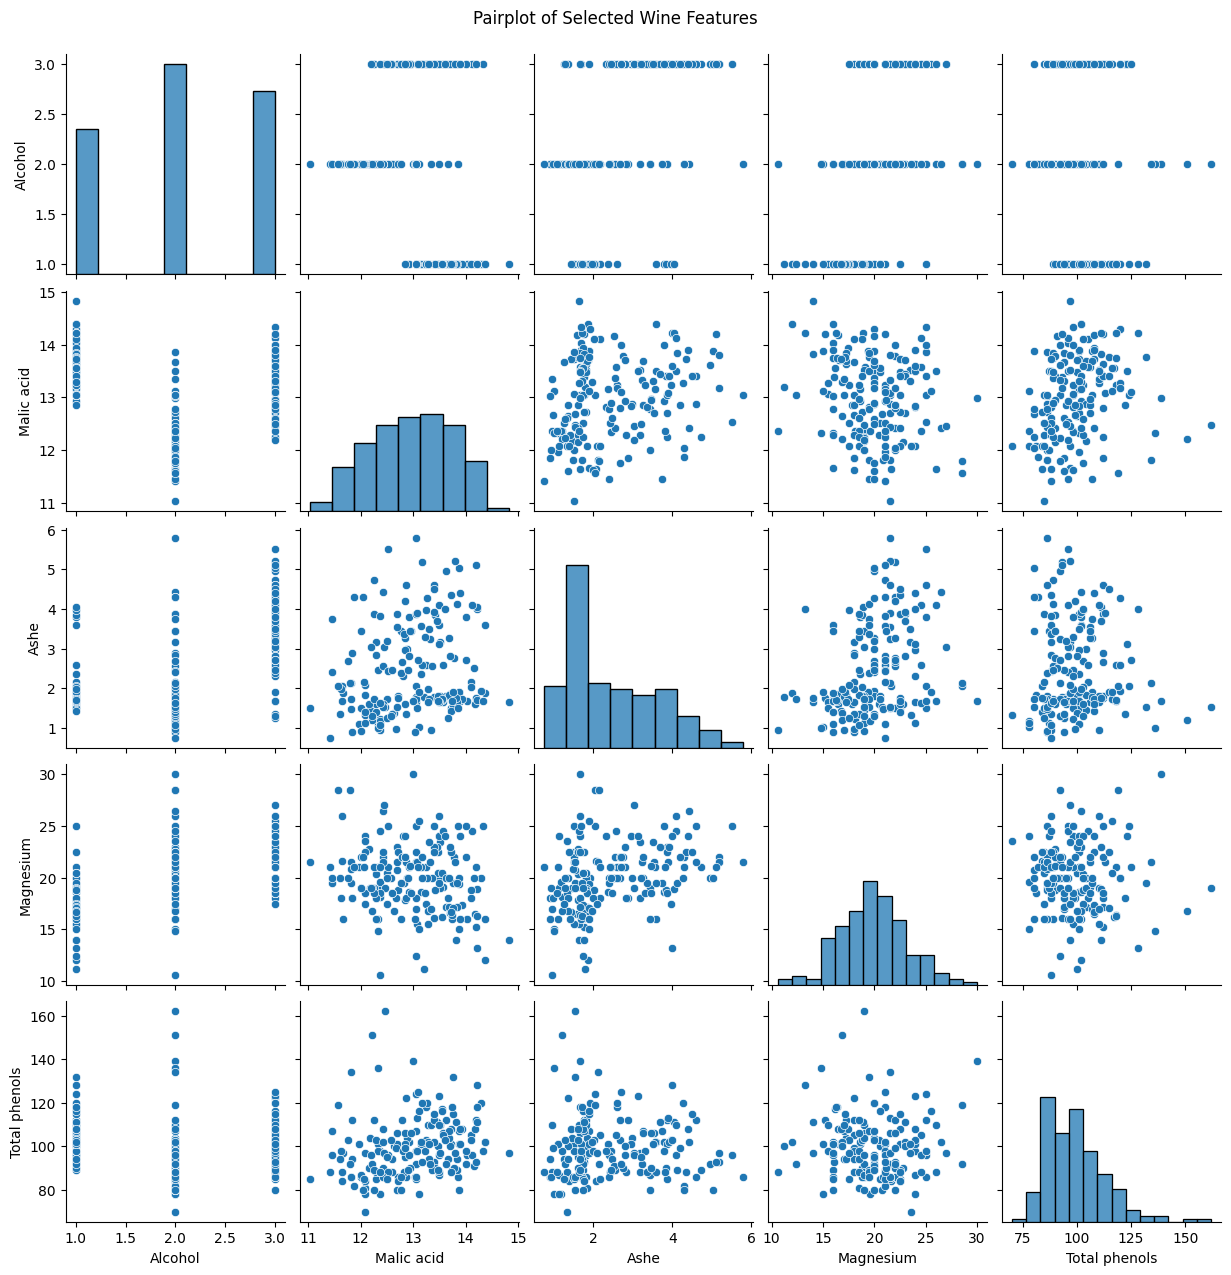

In [119]:
# Pairplot for selected features
selected_features = ['Alcohol', 'Malic acid', 'Ashe', 'Magnesium', 'Total phenols']
sns.pairplot(df[selected_features])
plt.suptitle('Pairplot of Selected Wine Features', y=1.02)
plt.show()

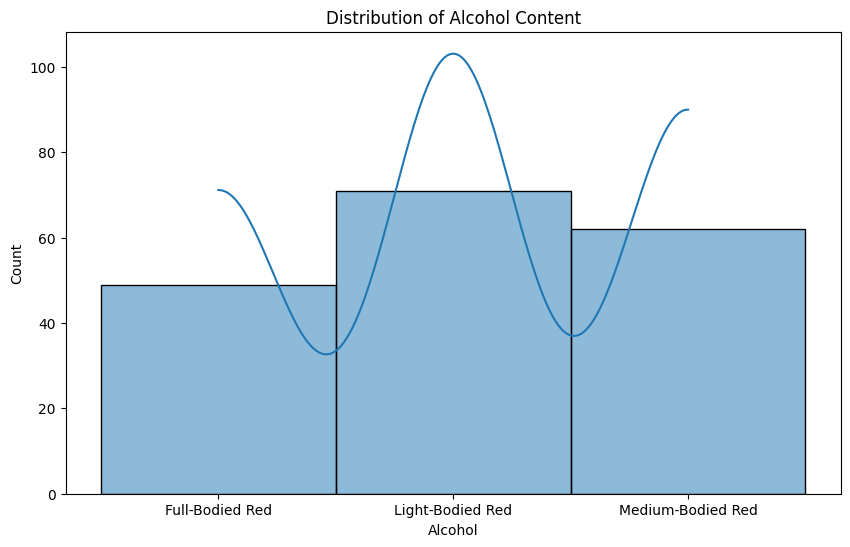

In [122]:
# Create a dictionary to map numeric classes to wine types
wine_types = {
    1: 'Full-Bodied Red', 
    2: 'Light-Bodied Red', 
    3: 'Medium-Bodied Red'
}

# Map the numeric classes in the 'Alcohol' column to corresponding wine types
df['Wine_Type'] = df['Alcohol'].map(wine_types)
# Distribution of Alcohol content
plt.figure(figsize=(10, 6))
sns.histplot(df['Wine_Type'], kde=True)
plt.title('Distribution of Alcohol Content')
plt.xlabel('Alcohol')
plt.ylabel('Count')
plt.show()


# Create a reverse mapping of wine types to numeric classes
wine_typesssss = {
    'Full-Bodied Red': 1, 
    'Light-Bodied Red': 2, 
    'Medium-Bodied Red': 3
}

# Map the wine types back to their corresponding numeric classes in the 'Alcohol' column
df['Wine_Type'] = df['Alcohol'].map(wine_typesssss)


Text(0.5, 0, 'Total Phenols')

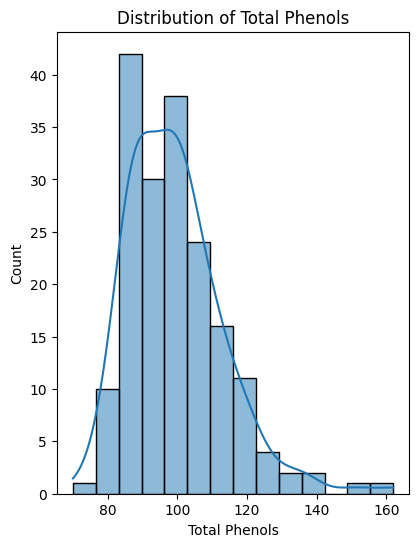

In [126]:
# Total phenols
plt.figure(figsize=(10, 6))
plt.subplot(122)
sns.histplot(df['Total phenols'], kde=True)
plt.title('Distribution of Total Phenols')
plt.xlabel('Total Phenols')

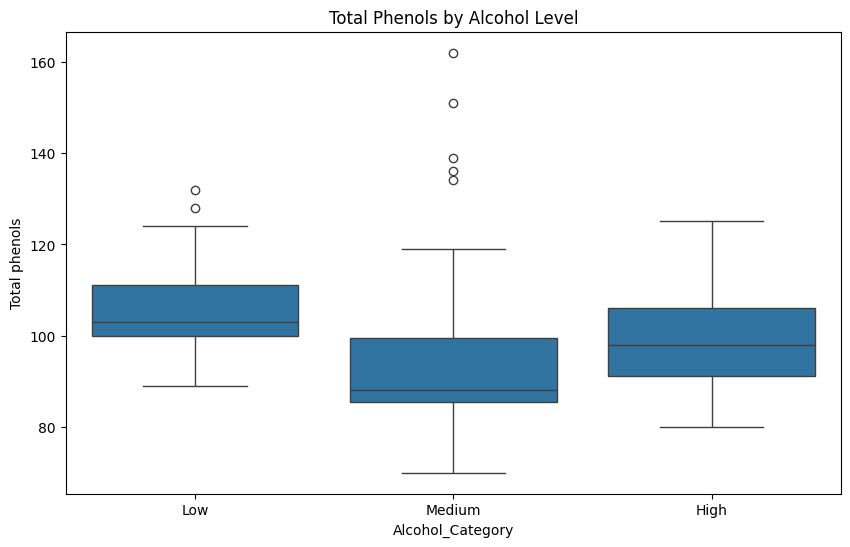

In [127]:
# Box plot of Total phenols by Alcohol level
df['Alcohol_Category'] = pd.cut(df['Alcohol'], bins=3, labels=['Low', 'Medium', 'High'])
plt.figure(figsize=(10, 6))
sns.boxplot(x='Alcohol_Category', y='Total phenols', data=df)
plt.title('Total Phenols by Alcohol Level')
plt.show()

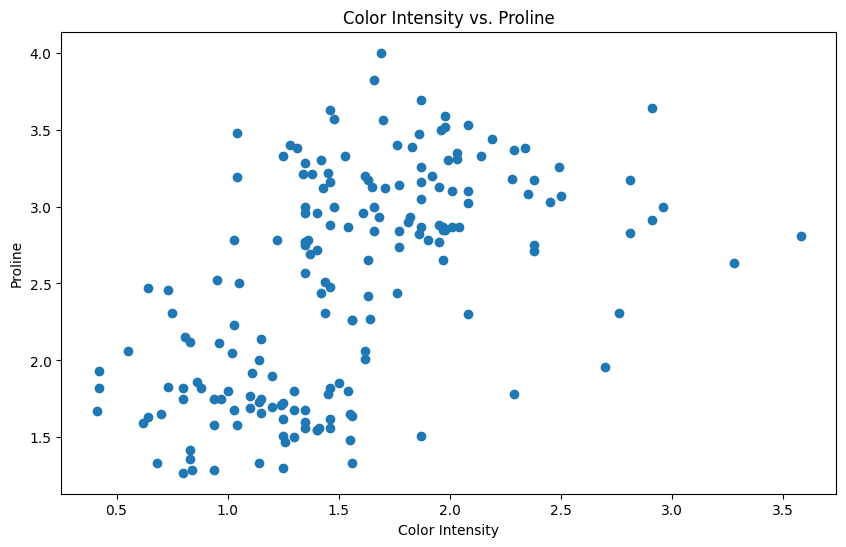

In [128]:
# Scatter plot of Color intensity vs. Proline
plt.figure(figsize=(10, 6))
plt.scatter(df['Color intensity'], df['Proline'])
plt.title('Color Intensity vs. Proline')
plt.xlabel('Color Intensity')
plt.ylabel('Proline')
plt.show()

# Machine leaning/ training 

In [156]:
# Assuming 'Alcohol' as the target variable (you may change this based on your specific goal)
X = df.drop(['Alcohol'], axis=1)
y = df['Alcohol']

In [157]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [149]:
# Scale the features
scaler = StandardScaler()

print(X_train.dtypes)

# Drop the 'Alcohol_Category' column from both X_train and X_test
# X_train = X_train.drop(columns=['Alcohol_Category'])
# X_test = X_test.drop(columns=['Alcohol_Category'])

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Malic acid              float64
Ashe                    float64
Alcalinity of ashe      float64
Magnesium               float64
Total phenols             int64
Flavanoidse             float64
Nonflavanoid phenols    float64
Proanthocyanins         float64
Color intensity         float64
OD280                   float64
OD31                    float64
Proline                 float64
dtype: object


In [150]:
# Classification 

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        11
         2.0       1.00      1.00      1.00        12
         3.0       1.00      1.00      1.00        15

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



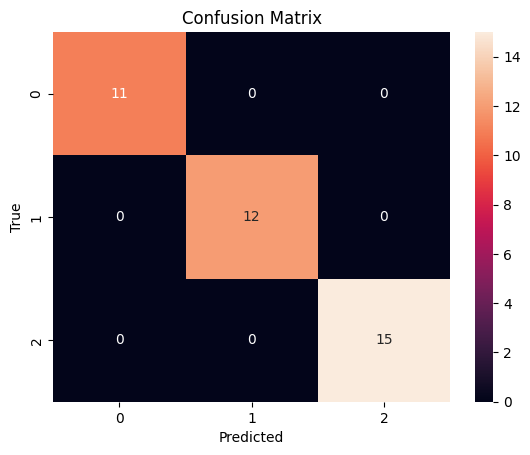

In [158]:
#Split the Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#: Standardize Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the Model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate the Model

y_pred = model.predict(X_test)

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
confusion_mtx = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_mtx, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()





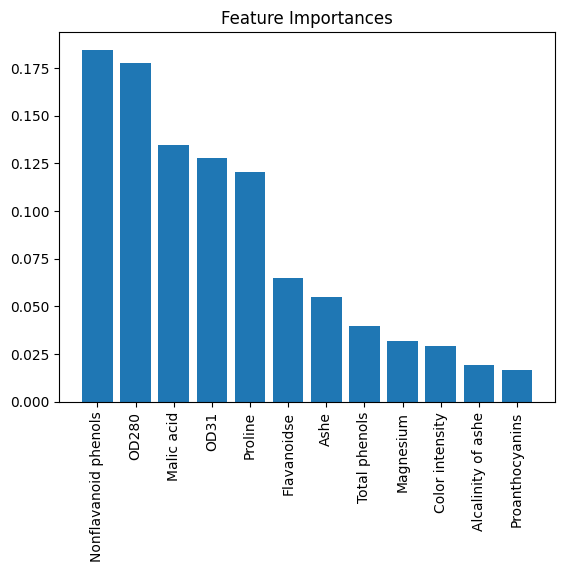

In [160]:
# Feature Importance

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure()
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()


In [171]:
# Define the models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

# Train the models and store their accuracies
accuracies = {}

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[name] = accuracy
    
    # Output evaluation metrics
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}\n")


Model: Random Forest
Accuracy: 1.0000
Confusion Matrix:
[[11  0  0]
 [ 0 12  0]
 [ 0  0 15]]
Classification Report:
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        11
         2.0       1.00      1.00      1.00        12
         3.0       1.00      1.00      1.00        15

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38


Model: SVM
Accuracy: 0.9737
Confusion Matrix:
[[10  1  0]
 [ 0 12  0]
 [ 0  0 15]]
Classification Report:
              precision    recall  f1-score   support

         1.0       1.00      0.91      0.95        11
         2.0       0.92      1.00      0.96        12
         3.0       1.00      1.00      1.00        15

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38


Model: K-Neare